In [ ]:
## To get this working

Open a terminal and ...

```
pip install numpy
apt-get python-matplotlib



// Databricks notebook source exported at Wed, 10 Feb 2016 20:42:12 UTC


#![Wikipedia Logo](http://sameerf-dbc-labs.s3-website-us-west-2.amazonaws.com/data/wikipedia/images/w_logo_for_labs.png)

# Explore English Wikipedia pageviews by second
### Time to complete: 15 minutes

#### Business questions:

* Question # 1) How many rows in the table refer to *mobile* vs *desktop* site requests?
* Question # 2) How many total incoming requests were to the *mobile* site vs the *desktop* site?
* Question # 3) What is the start and end range of time for the pageviews data? How many days total of data do we have?
* Question # 4) Which day of the week does Wikipedia get the most traffic?
* Question #  5) Can you visualize both the mobile and desktop site requests together in a line chart to compare traffic between both sites by day of the week?

#### Technical Accomplishments:

* Use Spark's Scala and Python APIs
* Learn what a `sqlContext` is and how to use it
* Load a 255 MB tab separated file into a DataFrame
* Cache a DataFrame into memory
* Run some DataFrame transformations and actions to create visualizations
* Learn the following DataFrame operations: `show()`, `printSchema()`, `orderBy()`, `filter()`, `groupBy()`, `cast()`, `alias()`, `distinct()`, `count()`, `sum()`, `avg()`, `min()`, `max()`
* Write a User Defined Function (UDF)
* Join two DataFrames
* Bonus: Use Matplotlib and Python code within a Scala notebook to create a line chart



Dataset: http://datahub.io/en/dataset/english-wikipedia-pageviews-by-second

 
### Bonus:
** Use Matplotlib to fix the line chart visualization above so that the y-axis starts with 0 **

 Databricks notebooks let you move seemlessly between Scala and Python code within the same notebook by using `%python` to declare python cells:

In [2]:
# Create a function named simpleMath
def simpleMath(x, y):
  z = x + y
  print "z is: ", z

In [3]:
simpleMath(2, 3)

z is:  5


 You can also import Matplotlib and easily create more sophisticated plots:

### Note: to get matplotlib to work you need to `pip install` some python packages

In [4]:
%matplotlib inline

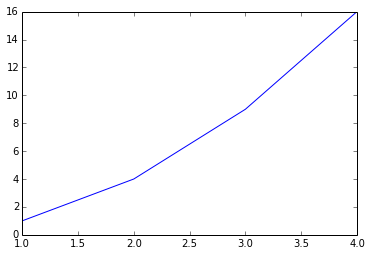

In [5]:
import numpy as np
import matplotlib.pyplot as plt

fig1, ax = plt.subplots()

# The first list of four numbers is for the x-axis and the next list is for the y-axis
ax.plot([1,2,3,4], [1,4,9,16])



 Note that learning Matplotlib is beyond the scope of this class, but you should get a idea of the power of integrating Mapplotlib in your notebooks by looking at the cells below.

 Recall that we had earlier cached 2 DataFrames, one with desktop views by day of week and another with mobile views by day of week:

# Maybe shove some pyspark in here, and plot live out of the spark dataframe!
- We don't mix scala and python in the same notebook

In [10]:
desktopViewsByDayOfWeekDF.show()

NameError: name 'desktopViewsByDayOfWeekDF' is not defined

In [ ]:
mobileViewsByDayOfWeekDF.show()

 First let's graph only the desktop views by day of week:

[0, 7, 0, 2000000000]

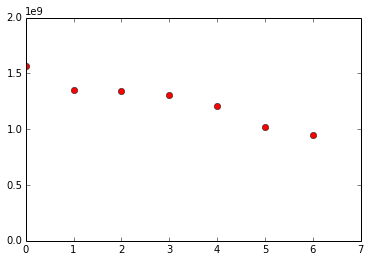

In [6]:
fig2, ax = plt.subplots()

# Notice that we are providing the coordinate manually for the x-axis
ax.plot([0,1,2,3,4,5,6], [1566792176,1346947425,1346330702,1306170813,1207342832,1016427413,947169611], 'ro')

# The axis() command takes a list of [xmin, xmax, ymin, ymax] and specifies the viewport of the axes
ax.axis([0, 7, 0, 2000000000])



 Next graph only the mobile views by day of week:

In [ ]:
%python

fig3, ax = plt.subplots()
ax.plot([0,1,2,3,4,5,6], [790026669,648087459,631284694,625338164,635169886,646334635,629556455], 'bo')

# The axis() command takes a list of [xmin, xmax, ymin, ymax] and specifies the viewport of the axes
ax.axis([0, 7, 0, 2000000000])

display(fig3)

 Finally, let's combine the 2 plots above and also programatically get the requests data from a DataFrame (instead of manually entering the y-axis corrdinates).

We need a technique to access the Scala DataFrames from the Python cells. To do this, we can register a temporary table in Scala, then call that table from Python.

In [ ]:
mobileViewsByDayOfWeekDF.registerTempTable("mobileViewsByDOW")
desktopViewsByDayOfWeekDF.registerTempTable("desktopViewsByDOW")

In [7]:

mobileViewsPythonDF = sqlContext.read.table("mobileViewsByDOW")

pythonListForMobileAll = [list(r) for r in mobileViewsPythonDF.collect()]

pythonListForMobileRequests = []

for item in pythonListForMobileAll:
        pythonListForMobileRequests.append(item[1])

pythonListForMobileRequests

Py4JJavaError: An error occurred while calling o123.table.
: org.apache.spark.sql.catalyst.analysis.NoSuchTableException
	at org.apache.spark.sql.hive.client.ClientInterface$$anonfun$getTable$1.apply(ClientInterface.scala:122)
	at org.apache.spark.sql.hive.client.ClientInterface$$anonfun$getTable$1.apply(ClientInterface.scala:122)
	at scala.Option.getOrElse(Option.scala:120)
	at org.apache.spark.sql.hive.client.ClientInterface$class.getTable(ClientInterface.scala:122)
	at org.apache.spark.sql.hive.client.ClientWrapper.getTable(ClientWrapper.scala:60)
	at org.apache.spark.sql.hive.HiveMetastoreCatalog.lookupRelation(HiveMetastoreCatalog.scala:384)
	at org.apache.spark.sql.hive.HiveContext$$anon$2.org$apache$spark$sql$catalyst$analysis$OverrideCatalog$$super$lookupRelation(HiveContext.scala:457)
	at org.apache.spark.sql.catalyst.analysis.OverrideCatalog$class.lookupRelation(Catalog.scala:161)
	at org.apache.spark.sql.hive.HiveContext$$anon$2.lookupRelation(HiveContext.scala:457)
	at org.apache.spark.sql.DataFrameReader.table(DataFrameReader.scala:338)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:231)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:379)
	at py4j.Gateway.invoke(Gateway.java:259)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:207)
	at java.lang.Thread.run(Thread.java:745)


In [ ]:

desktopViewsPythonDF = sqlContext.read.table("desktopViewsByDOW")

pythonListForDesktopAll = [list(r) for r in desktopViewsPythonDF.collect()]

pythonListForDesktopRequests = []

for item in pythonListForDesktopAll:
        pythonListForDesktopRequests.append(item[1])

pythonListForDesktopRequests

 We now have our two Python lists::

In [ ]:

pythonListForMobileRequests

In [ ]:

pythonListForDesktopRequests

 Finally, we are ready to plot both Desktop and Mobile requests using our python lists:

In [ ]:

fig3, ax = plt.subplots()

x_axis = [0,1,2,3,4,5,6]

ax.plot(x_axis, pythonListForDesktopRequests, marker='o', linestyle='--', color='r', label='Desktop')
ax.plot(x_axis, pythonListForMobileRequests, marker='o', label='Mobile')

ax.set_title('Desktop vs Mobile site requests')

ax.set_xlabel('Days of week')
ax.set_ylabel('# of requests')

ax.legend()

# The axis() command takes a list of [xmin, xmax, ymin, ymax] and specifies the viewport of the axes
ax.axis([0, 6, 0, 2000000000])

ax.xaxis.set_ticks(range(len(x_axis)), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

display(fig3)

 This concludes the Pageviews lab.